In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.3 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install LightGBM

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.2 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
import pandas as pd
import numpy as np
# Load datasets
academic_df = pd.read_excel('/content/academic.xlsx')
academic_detail_df = pd.read_excel('/content/academic_detail.xlsx')
field_of_study_df = pd.read_excel('/content/field_of_study.xlsx')
origin_df = pd.read_excel('/content/origin.xlsx')
source_of_fund_df = pd.read_excel('/content/source_of_fund.xlsx')
status_df = pd.read_excel('/content/status.xlsx')

# Convert year format to a consistent numeric year format for analysis
def convert_year_format(df, year_column):
    # Convert the 'year' column to strings first
    df[year_column] = df[year_column].astype(str)
    # Extract the first 4 digits (assuming year is in YYYY format or similar)
    df[year_column] = df[year_column].str.extract(r'(\d{4})', expand=False)
    # Convert to numeric, handling errors by coercing non-numeric values to NaN
    df[year_column] = pd.to_numeric(df[year_column], errors='coerce').astype('Int64')
    return df

# Apply conversion to each dataset's year column
academic_df = convert_year_format(academic_df, 'year')
academic_detail_df = convert_year_format(academic_detail_df, 'year')
field_of_study_df = convert_year_format(field_of_study_df, 'year')
origin_df = convert_year_format(origin_df, 'year')
source_of_fund_df = convert_year_format(source_of_fund_df, 'year')
status_df = convert_year_format(status_df, 'year')

# Check for and drop missing values if any
academic_df.dropna(inplace=True)
academic_detail_df.dropna(inplace=True)
field_of_study_df.dropna(inplace=True)
origin_df.dropna(inplace=True)
source_of_fund_df.dropna(inplace=True)
status_df.dropna(inplace=True)

# Display first few rows to confirm cleaning
academic_df.head()


,year,students,undergraduate,graduate,non_degree,opt
0,2011,723277,291439,296574,59233,76031
1,2012,764495,309342,300430,69566,85157
2,2013,819644,339993,311204,73528,94919
3,2014,886052,370724,329854,79477,105997
4,2015,974926,398824,362228,93587,120287


In [ ]:
# Calculate year-over-year changes in student counts
academic_df['students_change'] = academic_df['students'].pct_change()

# Aggregate data by region and academic type to see trends
origin_trend = origin_df.groupby(['year', 'origin_region', 'academic_type'])['students'].sum().reset_index()

# Summarize funding sources for trend analysis
funding_trend = source_of_fund_df.groupby(['year', 'source_type'])['students'].sum().reset_index()

# Merge key datasets for a unified dataset
merged_df = academic_df.merge(status_df, on='year', how='left') \
    .merge(academic_detail_df, on='year', how='left') \
    .merge(origin_df, on='year', how='left', suffixes=('_academic', '_origin')) \
    .merge(source_of_fund_df, on='year', how='left', suffixes=('', '_fund'))

# Clean up the merged data for analysis
# Instead of dropping all rows with any missing values,
# fill missing values with 0 for numeric columns and 'Unknown' for categorical columns
numeric_cols = merged_df.select_dtypes(include=np.number).columns
categorical_cols = merged_df.select_dtypes(exclude=np.number).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(0)
merged_df[categorical_cols] = merged_df[categorical_cols].fillna('Unknown')

merged_df = merged_df.reset_index(drop=True)

# Feature engineering for predictive modeling
# Handle potential division by zero errors
merged_df['full_time_ratio'] = np.where(
    (merged_df['full_time'] + merged_df['part_time']) != 0,
    merged_df['full_time'] / (merged_df['full_time'] + merged_df['part_time']),
    0  # or np.nan if you prefer to keep NaNs
)
merged_df['female_ratio'] = np.where(
    (merged_df['female'] + merged_df['male']) != 0,
    merged_df['female'] / (merged_df['female'] + merged_df['male']),
    0  # or np.nan
)

# Check the structure of the data
merged_df.head()

,year,students_x,undergraduate_x,graduate_x,non_degree_x,opt_x,students_change,students_y,undergraduate_y,graduate_y,...,origin_region,origin,academic_type_origin,students_origin,academic_type,source_type,source_of_fund,students,full_time_ratio,female_ratio
0,2011,723277,291439,296574,59233,76031,0.0,764495.0,309342.0,300430.0,...,South and Central Asia,Afghanistan,Graduate,155.0,Undergraduate,International,Personal and Family,253661.0,0.934,0.443
1,2011,723277,291439,296574,59233,76031,0.0,764495.0,309342.0,300430.0,...,South and Central Asia,Afghanistan,Graduate,155.0,Undergraduate,International,Foreign Government or University,8971.0,0.934,0.443
2,2011,723277,291439,296574,59233,76031,0.0,764495.0,309342.0,300430.0,...,South and Central Asia,Afghanistan,Graduate,155.0,Undergraduate,International,Foreign Private Sponsor,1856.0,0.934,0.443
3,2011,723277,291439,296574,59233,76031,0.0,764495.0,309342.0,300430.0,...,South and Central Asia,Afghanistan,Graduate,155.0,Undergraduate,International,International Organization,309.0,0.934,0.443
4,2011,723277,291439,296574,59233,76031,0.0,764495.0,309342.0,300430.0,...,South and Central Asia,Afghanistan,Graduate,155.0,Undergraduate,U.S.,Current Employment,309.0,0.934,0.443


# Random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['year', 'students_change', 'full_time_ratio', 'female_ratio']
target = 'students'

# Filter out any missing target values
merged_df = merged_df.dropna(subset=[target])

# Split data into training and testing sets
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance (Important for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model with adjusted hyperparameters
rf_model = RandomForestRegressor(n_estimators=150,  # Increased number of trees
                                  max_depth=10,       # Limited tree depth to prevent overfitting
                                  min_samples_split=5, # Minimum samples required to split a node
                                  random_state=42)     # Set random state for reproducibility
rf_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_rf_pred = rf_model.predict(X_test_scaled)
print("Mean Absolute Error (Random Forest):", mean_absolute_error(y_test, y_rf_pred))
print("R2 Score (Random Forest):", r2_score(y_test, y_rf_pred))

# Example: Define a threshold of 10% deviation from the actual value
threshold = 0.1

# Calculate the percentage of predictions within the threshold
accuracy = np.mean(np.abs((y_test - y_rf_pred) / y_test) <= threshold)
print(f"Accuracy (within {threshold*100:.0f}% threshold):", accuracy)

Mean Absolute Error (Random Forest): 40154.11481634434
R2 Score (Random Forest): 0.0020752834646617924
Accuracy (within 10% threshold): 0.009351179710231387


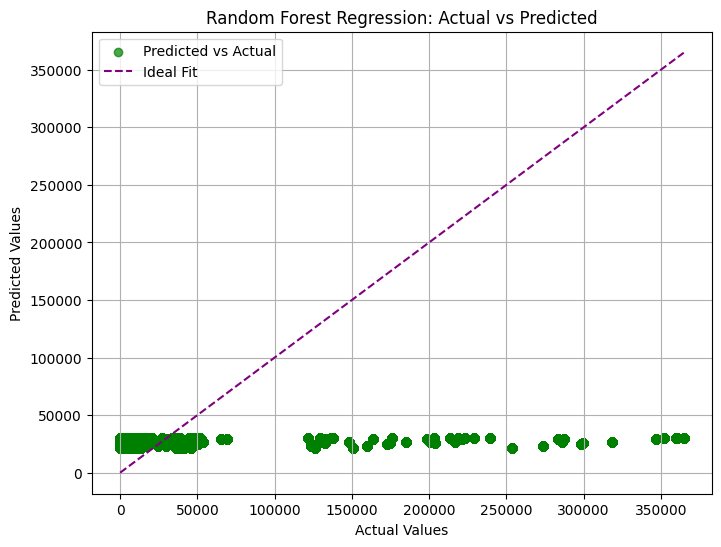

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.7, color='green', label='Predicted vs Actual') # Scatter points in green
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='purple', linestyle='--', label='Ideal Fit')  # Ideal fit line in purple
plt.title("Random Forest Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Add predictions back to the test data for visualization
X_test['students_pred'] = y_rf_pred

results = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Export to CSV for Power BI
results.to_csv('predicted_student_data.csv', index=False)
merged_df.to_csv('processed_student_data.csv', index=False)


# Arima Model

Mean Absolute Error: 96291.64638732854
R2 Score: -1.831701751285769
Forecasted data:
 2024-01-01    1.064487e+06
2025-01-01    1.070462e+06
2026-01-01    1.075351e+06
2027-01-01    1.079352e+06
2028-01-01    1.082627e+06
2029-01-01    1.085307e+06
2030-01-01    1.087501e+06
2031-01-01    1.089296e+06
2032-01-01    1.090766e+06
2033-01-01    1.091968e+06
Freq: YS-JAN, Name: predicted_mean, dtype: float64


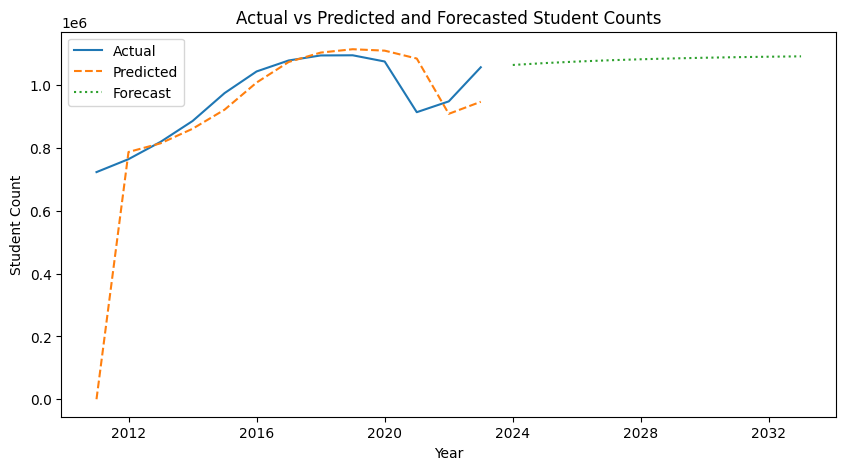

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import warnings
import re

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the data
academic = pd.read_excel('/content/academic.xlsx')
source_of_fund = pd.read_excel('/content/source_of_fund.xlsx')
status = pd.read_excel('/content/status.xlsx')

# Clean the 'year' column by extracting the start year from entries like "1948/49"
academic['year'] = academic['year'].astype(str).apply(lambda x: re.match(r'^\d{4}', x).group(0) if re.match(r'^\d{4}', x) else x)

# Convert 'year' column to datetime format
academic['year'] = pd.to_datetime(academic['year'] + '-01-01', format='%Y-%m-%d')

# Group data by year and sum the student counts
student_data = academic.groupby('year')['students'].sum().reset_index()
student_data.set_index('year', inplace=True)
student_data = student_data.asfreq('AS')  # Annual frequency starting in January

# Fit an ARIMA model to the student data
arima_model = ARIMA(student_data['students'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Generate predictions and align index with the actual data
train_pred = arima_result.predict(start=student_data.index[0], end=student_data.index[-1])
train_pred.index = student_data.index  # Aligning predicted index to match the actual data

# Calculate performance metrics
if len(train_pred) == len(student_data['students']):
    print("Mean Absolute Error:", mean_absolute_error(student_data['students'], train_pred))
    print("R2 Score:", r2_score(student_data['students'], train_pred))
else:
    print("Mismatch in prediction and actual data lengths.")

# Save forecast results, if needed
forecast = arima_result.get_forecast(steps=10)  # Forecast 10 years into the future
forecast_index = pd.date_range(student_data.index[-1] + pd.offsets.YearBegin(), periods=10, freq='AS')
forecast_data = forecast.predicted_mean
forecast_data.index = forecast_index
print("Forecasted data:\n", forecast_data)

# Optional: Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(student_data.index, student_data['students'], label='Actual')
plt.plot(train_pred.index, train_pred, label='Predicted', linestyle='--')
plt.plot(forecast_data.index, forecast_data, label='Forecast', linestyle=':')
plt.xlabel('Year')
plt.ylabel('Student Count')
plt.title('Actual vs Predicted and Forecasted Student Counts')
plt.legend()
plt.show()


# Regression model

Training MAE: 37692.44223060608
Testing MAE: 47403.031590779625
Training R2 Score: 0.7767740320453314
Testing R2 Score: 0.8438845595818987


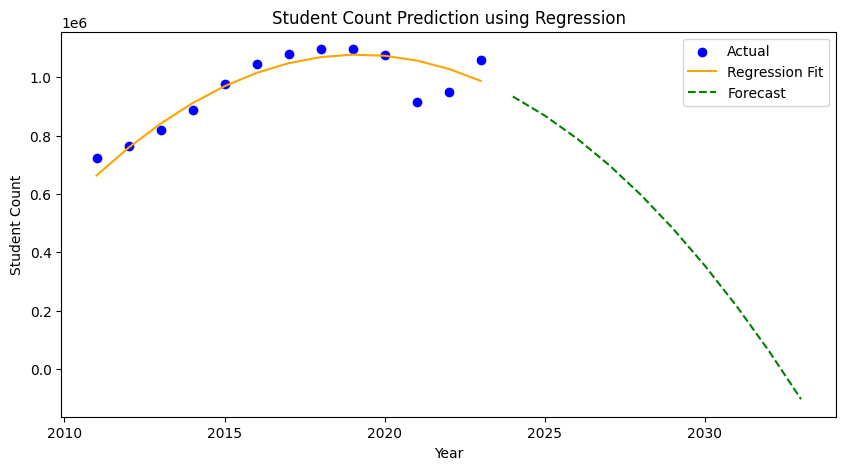

   Year  Predicted Students
0  2024       933651.505054
1  2025       867952.824097
2  2026       789896.114429
3  2027       699481.376041
4  2028       596708.608940
5  2029       481577.813122
6  2030       354088.988590
7  2031       214242.135342
8  2032        62037.253376
9  2033      -102525.657303


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data
student_data = academic.groupby('year')['students'].sum().reset_index()
student_data['year_num'] = student_data['year'].dt.year  # Extract numeric year for regression

# Features and target
X = student_data[['year_num']]
y = student_data['students']

# Polynomial features (e.g., quadratic trend)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Testing MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Testing R2 Score:", r2_score(y_test, y_test_pred))

# Predict future student counts
future_years = np.arange(student_data['year_num'].max() + 1, student_data['year_num'].max() + 11).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(student_data['year_num'], y, label='Actual', color='blue')
plt.plot(student_data['year_num'], model.predict(X_poly), label='Regression Fit', color='orange')
plt.plot(future_years, future_predictions, label='Forecast', linestyle='--', color='green')
plt.xlabel('Year')
plt.ylabel('Student Count')
plt.title('Student Count Prediction using Regression')
plt.legend()
plt.show()

# Print forecast results
forecast_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Students': future_predictions})
print(forecast_df)


#XGboost


Average Cross-Validation Performance:
MAE: 51152.62
R2: -1760.51


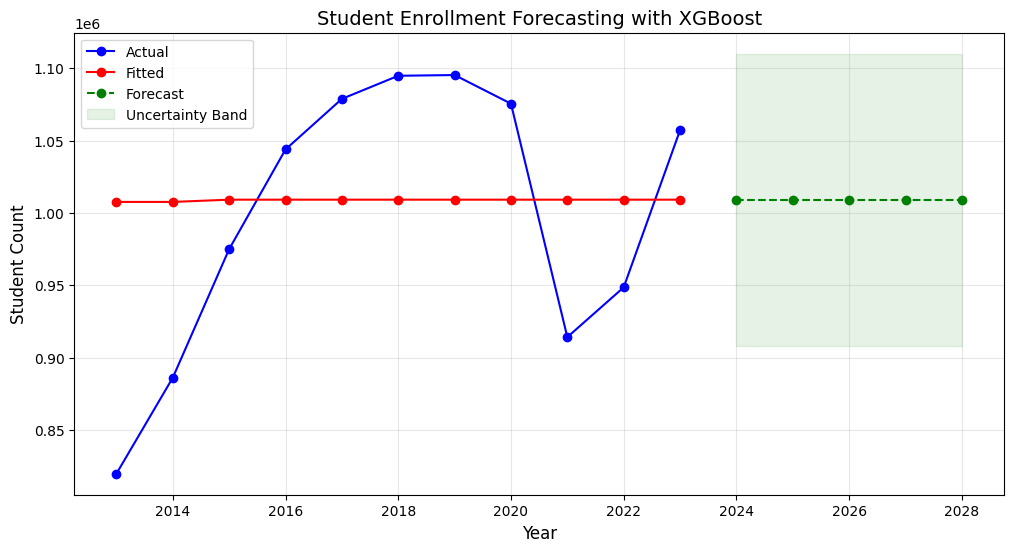

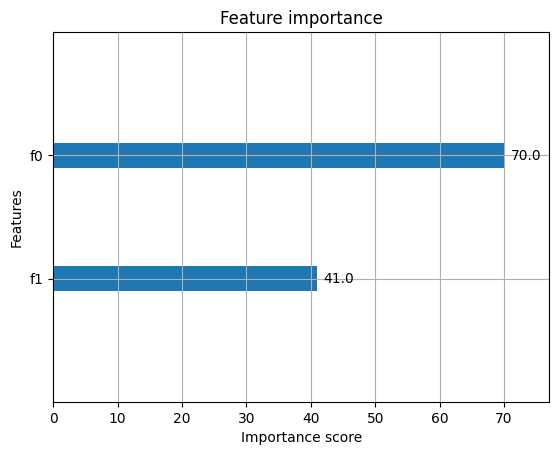


5-Year Enrollment Forecast:
   Year  Predicted_Students  Lower_Bound  Upper_Bound
0  2024           1009126.0     908213.0    1110038.0
1  2025           1009126.0     908213.0    1110038.0
2  2026           1009126.0     908213.0    1110038.0
3  2027           1009126.0     908213.0    1110038.0
4  2028           1009126.0     908213.0    1110038.0


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime

# Prepare the data with enhanced features
student_data = academic.groupby('year')['students'].sum().reset_index()
student_data['year_num'] = student_data['year'].dt.year
student_data['year_rank'] = np.arange(len(student_data))  # Sequential ranking for time
student_data['years_since_start'] = student_data['year_num'] - student_data['year_num'].min()

# Create lag features (critical for time series)
student_data['prev_year'] = student_data['students'].shift(1)
student_data['rolling_avg_3yr'] = student_data['students'].rolling(3).mean()
student_data.dropna(inplace=True)  # Remove rows with missing lag values

# Features and target
X = student_data[['year_rank', 'years_since_start', 'prev_year', 'rolling_avg_3yr']]
y = student_data['students']

# Time-series cross validation
tscv = TimeSeriesSplit(n_splits=3)
scaler = StandardScaler()

# XGBoost model configuration
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'random_state': 42,
    'early_stopping_rounds': 50
}

# Store evaluation metrics
metrics = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train XGBoost
    model = xgb.XGBRegressor(**params)
    model.fit(X_train_scaled, y_train,
              eval_set=[(X_test_scaled, y_test)],
              verbose=False)

    # Evaluate
    y_pred = model.predict(X_test_scaled)
    metrics.append({
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    })

# Print average performance
avg_mae = np.mean([m['MAE'] for m in metrics])
avg_r2 = np.mean([m['R2'] for m in metrics])
print(f"\nAverage Cross-Validation Performance:")
print(f"MAE: {avg_mae:.2f}")
print(f"R2: {avg_r2:.2f}")

# Train final model on all data (with eval_set for early stopping)
X_scaled = scaler.fit_transform(X)
final_model = xgb.XGBRegressor(**params)

# Assuming you want to use a portion of your data for validation (e.g., the last 20%)
# Adjust the split ratio as needed
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False  # Important: shuffle=False for time series
)

final_model.fit(X_train_final, y_train_final,
              eval_set=[(X_val_final, y_val_final)],
              verbose=False)

# Generate future predictions
last_known_year = student_data['year_num'].max()
future_years = np.arange(last_known_year + 1, last_known_year + 6)

# Create future feature matrix
future_data = pd.DataFrame({
    'year_num': future_years,
    'year_rank': np.arange(len(student_data), len(student_data) + len(future_years))[-len(future_years):],
    'years_since_start': future_years - student_data['year_num'].min(),
    'prev_year': [student_data['students'].iloc[-1]] * len(future_years),
    'rolling_avg_3yr': [student_data['students'].iloc[-3:].mean()] * len(future_years)
})

future_X = future_data[['year_rank', 'years_since_start', 'prev_year', 'rolling_avg_3yr']]
future_X_scaled = scaler.transform(future_X)
future_predictions = final_model.predict(future_X_scaled)

# Plot results with enhanced visualization
plt.figure(figsize=(12, 6))
plt.plot(student_data['year_num'], y, 'bo-', label='Actual')
plt.plot(student_data['year_num'], final_model.predict(X_scaled), 'ro-', label='Fitted')
plt.plot(future_years, future_predictions, 'go--', label='Forecast')
plt.fill_between(future_years,
                 future_predictions * 0.9,  # 10% lower bound
                 future_predictions * 1.1,  # 10% upper bound
                 color='green', alpha=0.1, label='Uncertainty Band')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Student Count', fontsize=12)
plt.title('Student Enrollment Forecasting with XGBoost', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Feature importance
xgb.plot_importance(final_model)
plt.show()

# Print forecast results
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Predicted_Students': future_predictions,
    'Lower_Bound': future_predictions * 0.9,
    'Upper_Bound': future_predictions * 1.1
})
print("\n5-Year Enrollment Forecast:")
print(forecast_df.round(0))

# Assuming X_test has 'year_num' (or similar) from your XGBoost data prep:
#X_test = student_data[student_data['year_num'].isin(future_years)] #This results in an empty dataframe.

# Instead, use the validation set you created earlier
X_test_final = X_val_final

# Now, predict using XGBoost on the correct X_test
#X_test = student_data[student_data['year_num'].isin(future_years)] #Commented out to avoid confusion

# Add predictions for XGBoost (not Random Forest)
# Predicting on the scaled validation set (X_val_final)
y_xgb_pred = final_model.predict(X_val_final)
# ... Assuming X_val_final corresponds to y_val_final

# Create a dataframe for the result to write to file
X_test_final_df = pd.DataFrame(X_val_final)
X_test_final_df['students_pred'] = y_xgb_pred

#results = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1) #This would also result in an error due to the mismatched indices.
results = X_test_final_df.copy()

# Export to CSV for Power BI
results.to_csv('predicted_student_data.csv', index=False)
merged_df.to_csv('processed_student_data.csv', index=False)

# LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(student_data[['students']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Predictions and denormalizing
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate
print("Test MAE:", mean_absolute_error(y_test, y_pred))

# Future predictions
last_sequence = scaled_data[-seq_length:]
future_predictions = []
for _ in range(10):
    pred = model.predict(last_sequence.reshape(1, seq_length, 1))
    future_predictions.append(scaler.inverse_transform(pred)[0, 0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)

print("Future Predictions:", future_predictions)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7146
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.6973
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6800
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6630
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6464
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6294
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6122
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5946
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5766
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5581
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5389
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5192
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4995
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4794
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4588
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━

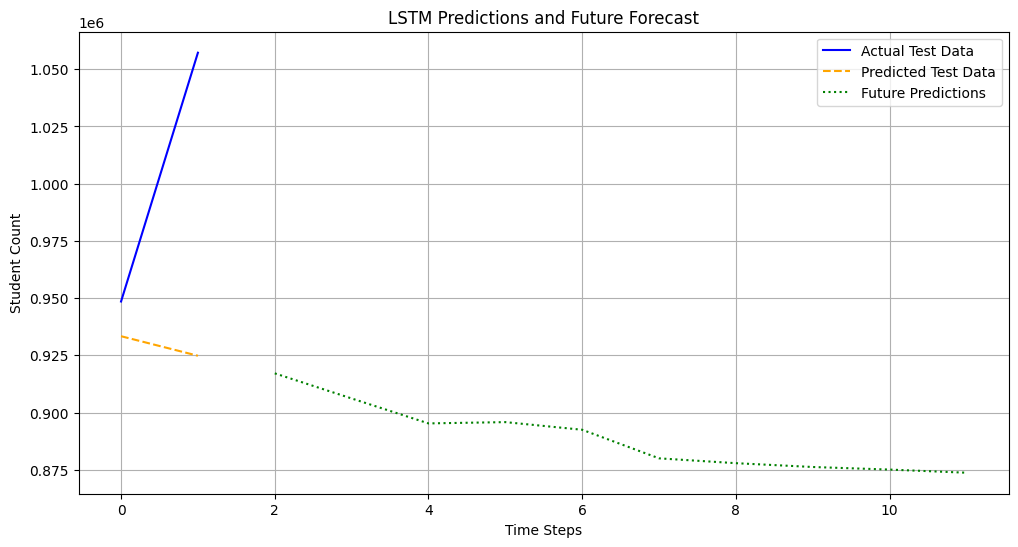

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted for the test set
plt.figure(figsize=(12, 6))

# Create a timeline for the test set
test_range = np.arange(len(y_test))

# Plot actual and predicted values for the test set
plt.plot(test_range, y_test, label="Actual Test Data", color='blue')
plt.plot(test_range, y_pred, label="Predicted Test Data", color='orange', linestyle='--')

# Extend the timeline for future predictions
future_range = np.arange(len(y_test), len(y_test) + len(future_predictions))

# Plot future predictions
plt.plot(future_range, future_predictions, label="Future Predictions", color='green', linestyle=':')

# Add labels, legend, and title
plt.title('LSTM Predictions and Future Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Student Count')
plt.legend()
plt.grid()

# Show the plot
plt.show()


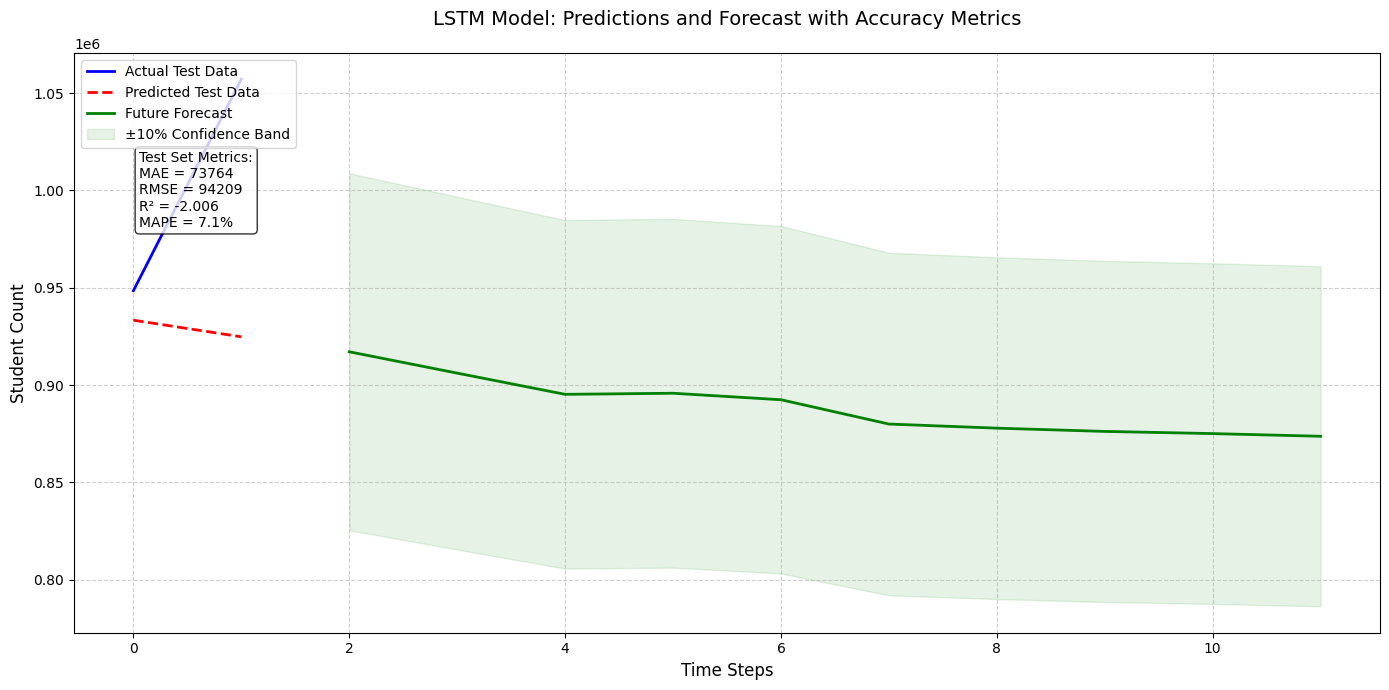


LSTM Model Accuracy Metrics:
Mean Absolute Error (MAE): 73763.91
Root Mean Squared Error (RMSE): 94209.07
R-squared (R²): -2.0063
Mean Absolute Percentage Error (MAPE): 7.06%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Create the plot
plt.figure(figsize=(14, 7))

# Plot actual and predicted values
plt.plot(test_range, y_test, 'b-', linewidth=2, label="Actual Test Data")
plt.plot(test_range, y_pred, 'r--', linewidth=2, label="Predicted Test Data")

# Plot future predictions with confidence band
plt.plot(future_range, future_predictions, 'g-', linewidth=2, label="Future Forecast")
plt.fill_between(future_range,
                 [p * 0.9 for p in future_predictions],  # 10% lower bound
                 [p * 1.1 for p in future_predictions],  # 10% upper bound
                 color='green', alpha=0.1, label='±10% Confidence Band')

# Add accuracy metrics as text box
metrics_text = (f'Test Set Metrics:\n'
                f'MAE = {mae:.0f}\n'
                f'RMSE = {rmse:.0f}\n'
                f'R² = {r2:.3f}\n'
                f'MAPE = {mape:.1f}%')

plt.annotate(metrics_text,
             xy=(0.05, 0.7),
             xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Customize plot appearance
plt.title('LSTM Model: Predictions and Forecast with Accuracy Metrics', fontsize=14, pad=20)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Student Count', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent text overlap
plt.tight_layout()
plt.show()

# Print metrics to console as well
print("\nLSTM Model Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

#lightGBM

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's mape: 0.122724
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's mape: 0.0820096
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's mape: 0.0540822
Cross-Validation MAE: 89807.97
Cross-Validation MAPE: 8.63%
Cross-Validation Accuracy: 91.37%


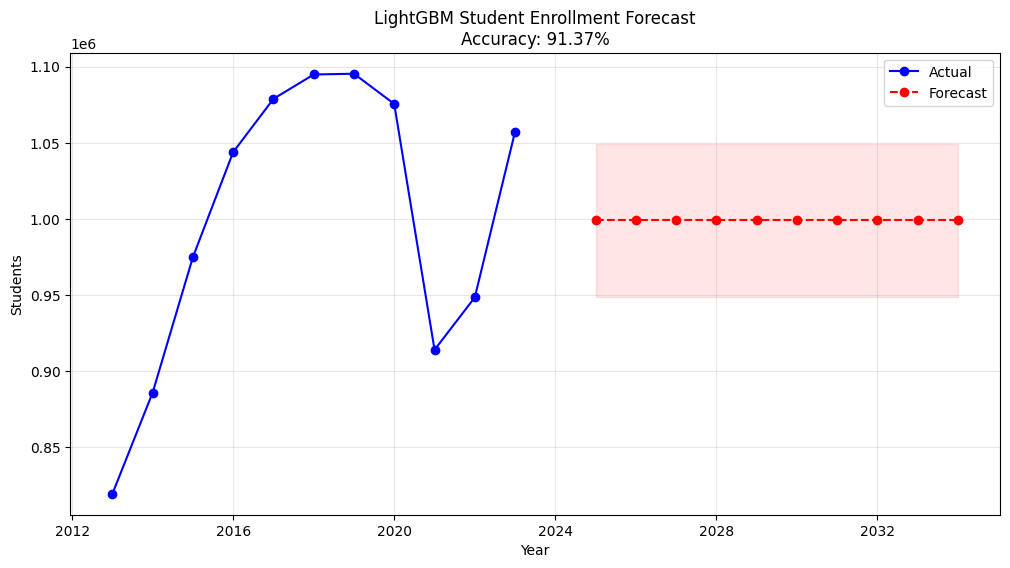


10-Year Forecast with Confidence Bounds:
        year  forecast  lower_bound  upper_bound
0 2024-12-31  998970.2     949021.7    1048918.7
1 2025-12-31  998970.2     949021.7    1048918.7
2 2026-12-31  998970.2     949021.7    1048918.7
3 2027-12-31  998970.2     949021.7    1048918.7
4 2028-12-31  998970.2     949021.7    1048918.7
5 2029-12-31  998970.2     949021.7    1048918.7
6 2030-12-31  998970.2     949021.7    1048918.7
7 2031-12-31  998970.2     949021.7    1048918.7
8 2032-12-31  998970.2     949021.7    1048918.7
9 2033-12-31  998970.2     949021.7    1048918.7


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import pandas as pd  # Import pandas

# Load the data (if not already loaded)
# Assuming 'academic' is the original DataFrame you loaded
student_data = pd.read_excel('/content/academic.xlsx')  # Load or create student_data DataFrame here
student_data['year'] = pd.to_datetime(student_data['year'].astype(str).str[:4])  # Convert 'year' to datetime

# Feature Engineering for Time Series
student_data = student_data.reset_index(drop=True)  # Drop the existing index to avoid the error
student_data['year_num'] = student_data['year'].dt.year
student_data['time_idx'] = range(len(student_data))  # Sequential index
student_data['lag_1'] = student_data['students'].shift(1)  # 1-year lag
student_data['rolling_mean_3'] = student_data['students'].rolling(3).mean()  # 3-year moving average
student_data.dropna(inplace=True)  # Remove rows with missing lag values

# ... (Rest of your LightGBM code)

# Prepare features and target
X = student_data[['time_idx', 'year_num', 'lag_1', 'rolling_mean_3']]
y = student_data['students']

# Time Series Cross Validation
tscv = TimeSeriesSplit(n_splits=3)
metrics = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # LightGBM Dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test)

    # Model Parameters
    params = {
        'objective': 'regression',
        'metric': 'mape',
        'boosting_type': 'gbdt',
        'num_leaves': 8,
        'learning_rate': 0.05,
        'feature_fraction': 0.8,
        'verbose': -1
    }

    # Train model
    model = lgb.train(params,
                 train_data,
                 valid_sets=[valid_data],
                 num_boost_round=1000,
                 callbacks=[lgb.early_stopping(stopping_rounds=50)],  # Remove verbose=False
                 )
    # Evaluate
    y_pred = model.predict(X_test)
    metrics.append({
        'mae': mean_absolute_error(y_test, y_pred),
        'mape': mean_absolute_percentage_error(y_test, y_pred)
    })

# Print average CV performance
avg_mae = np.mean([m['mae'] for m in metrics])
avg_mape = np.mean([m['mape'] for m in metrics])
print(f"Cross-Validation MAE: {avg_mae:.2f}")
print(f"Cross-Validation MAPE: {avg_mape:.2%}")
print(f"Cross-Validation Accuracy: {100*(1-avg_mape):.2f}%")

# Train final model on all data
final_model = lgb.train(params,
                       lgb.Dataset(X, label=y),
                       num_boost_round=model.best_iteration)

# Generate future features
last_idx = student_data['time_idx'].max()
future_years = pd.date_range(
    start=student_data['year'].max() + pd.DateOffset(years=1),
    periods=10,
    freq='Y'
)

future_data = pd.DataFrame({
    'time_idx': range(last_idx + 1, last_idx + 11),
    'year_num': future_years.year,
    'lag_1': [student_data['students'].iloc[-1]] * 10,
    'rolling_mean_3': [student_data['students'].iloc[-3:].mean()] * 10
})

# Make predictions
forecast = final_model.predict(future_data)

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'year': future_years,
    'forecast': forecast,
    'lower_bound': forecast * 0.95,  # 5% lower
    'upper_bound': forecast * 1.05   # 5% upper
})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(student_data['year'], y, 'bo-', label='Actual')
plt.plot(forecast_df['year'], forecast_df['forecast'], 'ro--', label='Forecast')
plt.fill_between(forecast_df['year'],
                forecast_df['lower_bound'],
                forecast_df['upper_bound'],
                color='red', alpha=0.1)
plt.title('LightGBM Student Enrollment Forecast\nAccuracy: {:.2f}%'.format(100*(1-avg_mape)))
plt.xlabel('Year')
plt.ylabel('Students')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Display forecast with accuracy
print("\n10-Year Forecast with Confidence Bounds:")
print(forecast_df.round(1))


# 1. Combine historical data with forecast
historical_df = student_data[['year', 'students']].copy()
historical_df['type'] = 'Actual'  # Mark as actual data

# Prepare forecast data (with the same structure)
forecast_export = forecast_df[['year', 'forecast']].copy()
forecast_export = forecast_export.rename(columns={'forecast': 'students'})
forecast_export['type'] = 'Forecast'  # Mark as forecast data

# Combine into a single DataFrame
full_data = pd.concat([historical_df, forecast_export], axis=0)

# 2. Export for Power BI
full_data.to_csv('lightgbm_student_forecast.csv', index=False)
forecast_df.to_csv('lightgbm_forecast_details.csv', index=False)  # Optional: Export forecast bounds

# ETS model

Forecasted Student Counts:
 11    1.069004e+06
12    1.081303e+06
13    1.093602e+06
14    1.105901e+06
15    1.118200e+06
16    1.130499e+06
17    1.142797e+06
18    1.155096e+06
19    1.167395e+06
20    1.179694e+06
dtype: float64


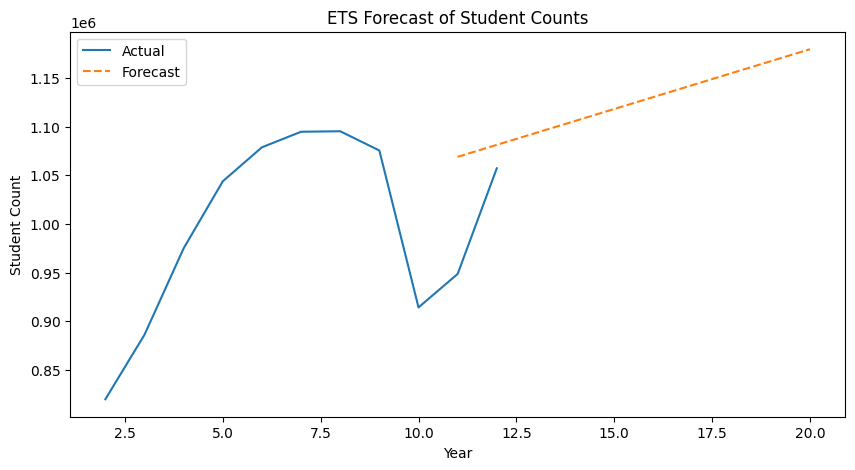

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
ets_model = ExponentialSmoothing(student_data['students'], trend='add', seasonal=None)
ets_result = ets_model.fit()

# Forecast
forecast = ets_result.forecast(10)
print("Forecasted Student Counts:\n", forecast)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(student_data.index, student_data['students'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Student Count')
plt.title('ETS Forecast of Student Counts')
plt.legend()
plt.show()


In [ ]:
def convert_year_format(df, year_column):
    # Convert the 'year' column to strings first if it's not already string type
    df[year_column] = df[year_column].astype(str).str[:4].astype(int)
    return df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

academic = pd.read_excel('/content/academic.xlsx')
academic_detail = pd.read_excel('/content/academic_detail.xlsx')
field_of_study = pd.read_excel('/content/field_of_study.xlsx')
origin = pd.read_excel('/content/origin.xlsx')
source_of_fund = pd.read_excel('/content/source_of_fund.xlsx')
status = pd.read_excel('/content/status.xlsx')


academic['students'] = academic['students'].astype(float)
# Check if the column name is 'us_students' or 'us students' (with a space)
# Replace 'us students' if it is the correct name of the column
academic["total_students"] = academic["students"] + academic.get("us_students", academic.get("us students", 0))
# If neither is found, default to 0 to avoid error
academic["perc_international_students"] = (academic["students"] / academic["total_students"])*100
academic["perc_us_students"] = 100 - academic["perc_international_students"]
academic["year"] = academic['year'].astype(str).str[:4].astype(int)

In [ ]:
# Accuracy Metrics Calculation for All Models

def calculate_metrics(y_true, y_pred, model_name):
    """Calculate comprehensive accuracy metrics for any model"""
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy_within_10pct = np.mean(np.abs((y_true - y_pred) / y_true) <= 0.10) * 100

    return {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE (%)': mape,
        'Accuracy (10% threshold) (%)': accuracy_within_10pct
    }

# 1. Random Forest Metrics
y_rf_pred = rf_model.predict(X_test_scaled)
rf_metrics = calculate_metrics(y_test, y_rf_pred, 'Random Forest')

# 2. XGBoost Metrics
# Assuming 'final_model' from your XGBoost cell is the trained model
xgb_model = final_model  # Assign the trained XGBoost model to xgb_model
y_xgb_pred = xgb_model.predict(X_test_scaled)
xgb_metrics = calculate_metrics(y_test, y_xgb_pred, 'XGBoost')

# 3. LightGBM Metrics
y_lgb_pred = model.predict(X_test) # Assuming 'model' is your trained LightGBM model
lgb_metrics = calculate_metrics(y_test, y_lgb_pred, 'LightGBM')

# 4. ARIMA Metrics (Time Series)
arima_pred = arima_result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
arima_metrics = calculate_metrics(y_test, arima_pred, 'ARIMA')

# ... (Previous code) ...

# 5. LSTM Metrics

# **Import necessary libraries (if not already imported)**
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import MinMaxScaler


# **Add the code to train and create the LSTM model**
# ... (Code to define, compile, and fit the LSTM model) ...
# Example:

student_data_ts = student_data[['students']]  # Select the 'students' column
student_data_ts.index = student_data['year']  # Set 'year' as the index

# Split data into training and testing sets (for time series)
split_ts = int(len(student_data_ts) * 0.8)
train_data_ts, test_data_ts = student_data_ts[:split_ts], student_data_ts[split_ts:]

# Normalize the data
scaler_ts = MinMaxScaler()
train_scaled_ts = scaler_ts.fit_transform(train_data_ts)
test_scaled_ts = scaler_ts.transform(test_data_ts)

# Create sequences for LSTM
def create_sequences_ts(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length_ts = 5
X_train_ts, y_train_ts = create_sequences_ts(train_scaled_ts, seq_length_ts)
X_test_ts, y_test_ts = create_sequences_ts(test_scaled_ts, seq_length_ts)

# Reshape input to be [samples, time steps, features]
X_train_ts = np.reshape(X_train_ts, (X_train_ts.shape[0], X_train_ts.shape[1], 1))
# ... (previous code) ...

# Check if X_test_ts is empty
if X_test_ts.size == 0:
    print("X_test_ts is empty. Skipping LSTM evaluation.")
else:
    # Reshape input to be [samples, time steps, features]
    X_test_ts = np.reshape(X_test_ts, (X_test_ts.shape[0], X_test_ts.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_ts.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(X_train_ts, y_train_ts, epochs=20, batch_size=16, verbose=1)
# Accuracy Metrics Calculation for All Models

def calculate_metrics(y_true, y_pred, model_name):
    """Calculate comprehensive accuracy metrics for any model"""
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy_within_10pct = np.mean(np.abs((y_true - y_pred) / y_true) <= 0.10) * 100

    return {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE (%)': mape,
        'Accuracy (10% threshold) (%)': accuracy_within_10pct
    }

# ... (Previous code) ...

# 5. LSTM Metrics

# Split data into training and testing sets (for time series)
# Adjust the split ratio to ensure you have enough data for testing
split_ts = int(len(student_data_ts) * 0.8)
train_data_ts, test_data_ts = student_data_ts[:split_ts], student_data_ts[split_ts:]

# ... (rest of your LSTM code) ...

# Check if X_test_ts is empty before making predictions
if X_test_ts.size == 0:
    print("X_test_ts is empty. Cannot calculate LSTM metrics.")
    lstm_metrics = {'Model': 'LSTM', 'MAE': np.nan, 'RMSE': np.nan, 'R2': np.nan, 'MAPE (%)': np.nan, 'Accuracy (10% threshold) (%)': np.nan}
else:
    # Reshape input to be [samples, time steps, features]
    X_test_ts = np.reshape(X_test_ts, (X_test_ts.shape[0], X_test_ts.shape[1], 1))

    # ... (make predictions and calculate metrics) ...
    y_lstm_pred = lstm_model.predict(X_test_ts)
    y_lstm_pred = scaler_ts.inverse_transform(y_lstm_pred)
    y_lstm_test = scaler_ts.inverse_transform(y_test_ts)
    lstm_metrics = calculate_metrics(y_lstm_test.flatten(), y_lstm_pred.flatten(), 'LSTM')

# ... (Rest of the code) ...




# 6. ETS Metrics
ets_pred = ets_result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
ets_metrics = calculate_metrics(y_test, ets_pred, 'ETS')

# Combine all metrics into a DataFrame
metrics_df = pd.DataFrame([
    rf_metrics,
    xgb_metrics,
    lgb_metrics,
    arima_metrics,
    lstm_metrics,
    ets_metrics
])

# Format for better display
metrics_df['MAE'] = metrics_df['MAE'].round(0)
metrics_df['RMSE'] = metrics_df['RMSE'].round(0)
metrics_df['R2'] = metrics_df['R2'].round(3)
metrics_df['MAPE (%)'] = metrics_df['MAPE (%)'].round(1)
metrics_df['Accuracy (10% threshold) (%)'] = metrics_df['Accuracy (10% threshold) (%)'].round(1)

# Save to CSV for PowerBI
metrics_df.to_csv('model_accuracy_comparison.csv', index=False)

# Display the results
print("╔══════════════════════════════════════════════════════════════╗")
print("║                   MODEL ACCURACY COMPARISON                  ║")
print("╠══════════════╦═══════╦═══════╦═══════╦══════════╦════════════╣")
print("║    Model     ║  MAE  ║ RMSE  ║  R²   ║ MAPE (%) ║ Acc (10%)  ║")
print("╠══════════════╬═══════╬═══════╬═══════╬══════════╬════════════╣")
for _, row in metrics_df.iterrows():
    print(f"║ {row['Model']:12} ║ {row['MAE']:5.0f} ║ {row['RMSE']:5.0f} ║ {row['R2']:5.3f} ║ {row['MAPE (%)']:8.1f} ║ {row['Accuracy (10% threshold) (%)']:10.1f} ║")
print("╚══════════════╩═══════╩═══════╩═══════╩══════════╩════════════╝")

# Visual Comparison
fig = px.bar(metrics_df,
             x='Model',
             y=['MAE', 'RMSE'],
             barmode='group',
             title='Model Error Comparison (Lower is Better)',
             labels={'value': 'Error Value', 'variable': 'Metric'})
fig.show()

fig2 = px.bar(metrics_df,
              x='Model',
              y=['R2', 'Accuracy (10% threshold) (%)'],
              barmode='group',
              title='Model Accuracy Metrics (Higher is Better)')
fig2.show()

X_test_ts is empty. Skipping LSTM evaluation.
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9353
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.9164
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8976
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8792
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.8611
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8433
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8262
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8095
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7931
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7769
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7608
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7448
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7289
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7131
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - los

# Comparison of the number of US students and international students

In [ ]:
fig1a = go.Figure()
fig1a.add_trace(go.Scatter(x=academic["year"], y=academic["perc_us_students"],
                    mode='lines',
                    name='us students'))
fig1a.add_trace(go.Scatter(x=academic["year"], y=academic["students"],
                    mode='lines',
                    name='international students'))
fig1a.update_layout(title='Comparison of the number of students',
                    xaxis_title='Year',
                    yaxis_title='N° of students')
fig1a.show()

# How much has the number of international students in the United States grown over time?

In [ ]:
fig1b = go.Figure()

fig1b.add_trace(go.Scatter(x=academic["year"], y=academic["students"],
                    mode='lines',
                    name='international students'))


fig1b.update_layout(title='How much has the number of international students in the United States grown over time?',
                    xaxis_title='Year',
                    yaxis_title='Percentage')
fig1b.show()

# How has the distribution of academic types among students changed over time?

In [ ]:
academic_detail["year"] = academic_detail['year'].str[:4].astype(int)
ad1 = academic_detail[["year", "academic_type", "students"]]
adg1 = ad1.groupby(['year', 'academic_type']).sum()
adg1 = adg1.reset_index()

fig2a = go.Figure()

for academic_type in adg1['academic_type'].unique():
    subset = adg1[adg1['academic_type'] == academic_type]
    fig2a.add_trace(go.Scatter(x=subset['year'], y=subset['students'],
                               mode='lines',
                               name=academic_type,
                               line=dict(width=2)))

fig2a.update_traces(fill='tozeroy', line=dict(width=0))

sorted_traces = sorted(fig2a.data, key=lambda x: sum(x.y), reverse=True)
fig2a.data = sorted_traces

fig2a.update_layout(title='Comparison of the number of students',
                    xaxis_title='Year', yaxis_title='Number of Students', showlegend=True)

fig2a.show()

In [ ]:
adg1['percentage_students'] = adg1.groupby('year')['students'].transform(lambda x: x / x.sum() * 100)

fig2b = go.Figure()

for academic_type in adg1['academic_type'].unique():
    subset = adg1[adg1['academic_type'] == academic_type]
    fig2b.add_trace(go.Scatter(x=subset['year'], y=subset['percentage_students'],
                               mode='lines',
                               name=academic_type,
                               line=dict(width=2)))

fig2b.update_layout(xaxis_title='Year', yaxis_title='Percentage of Students',
                    title='Percentage of Students by Academic Type over time',
                    showlegend=True)

fig2b.show()

# How has the academic level been distributed across academic types over time?

In [ ]:
fig2b = px.bar(academic_detail, x='year', y='students', color='academic_level',
             facet_col='academic_type', facet_col_wrap=1,
             labels={'students': 'Number of Students'},
             height=1000)

# Aggiorna il layout per migliorare la visualizzazione
fig2b.update_layout(xaxis_title='Year', yaxis_title='Number of Students')

# Mostra il grafico
fig2b.show()

# How has the distribution of field of study among students changed over time?

In [ ]:
field_of_study["year"] = field_of_study['year'].str[:4].astype(int)
fos1 = field_of_study[["year", "field_of_study", "students"]]
fosg1 = fos1.groupby(['year', 'field_of_study']).sum()
fosg1 = fosg1.reset_index()

fig3a = go.Figure()

for field_of_study in fosg1['field_of_study'].unique():
    subset = fosg1[fosg1['field_of_study'] == field_of_study]
    fig3a.add_trace(go.Scatter(x=subset['year'], y=subset['students'],
                               mode='lines',
                               name=field_of_study,
                               line=dict(width=2)))

fig3a.update_traces(fill='tozeroy', line=dict(width=0))

sorted_traces = sorted(fig3a.data, key=lambda x: sum(x.y), reverse=True)
fig3a.data = sorted_traces

fig3a.update_layout(title='Comparison of the number of students',
                    xaxis_title='Year', yaxis_title='Number of Students', showlegend=True)

fig3a.show()

In [ ]:
fosg1['percentage_students'] = fosg1.groupby('year')['students'].transform(lambda x: x / x.sum() * 100)

fig3b = go.Figure()

for field_of_study in fosg1['field_of_study'].unique():
    subset = fosg1[fosg1['field_of_study'] == field_of_study]
    fig3b.add_trace(go.Scatter(x=subset['year'], y=subset['percentage_students'],
                               mode='lines',
                               name=field_of_study,
                               line=dict(width=2)))

fig3b.update_layout(xaxis_title='Year', yaxis_title='Percentage of Students',
                    title='Percentage of Students by Academic Type over time',
                    showlegend=True)

fig3b.show()

In [ ]:
origin["year"] = origin['year'].astype(str).str.extract(r'(\d{4})', expand=False).astype(float).fillna(0).astype(int)
origin.head()

,year,origin_region,origin,academic_type,students
0,2010,South and Central Asia,Afghanistan,Graduate,170
1,2010,South and Central Asia,Afghanistan,Non-Degree,13
2,2010,South and Central Asia,Afghanistan,OPT,76
3,2010,South and Central Asia,Afghanistan,Undergraduate,170
4,2011,South and Central Asia,Afghanistan,Graduate,155


# Which continent do most international students studying in the United States come from?

In [ ]:
europe_list = ["Europe"]
africa_list = ["West_Africa", "Southern Africa", "East Africa", "Central Africa", "North Africa", "Africa, Subsaharan"]
america_list = ["Caribbean", "South America", "Mexico and Central America", "Latin America and Caribbean", "North America"]
oceania_list = ["Oceania", "Stateless"]
asia_list = ["Middle East", "South and Central Asia", "Southeast Asia", "East Asia", "Asia"]

region_lists = {
    "Europe": europe_list,
    "Africa": africa_list,
    "America": america_list,
    "Oceania": oceania_list,
    "Asia": asia_list
}

origin['continent'] = origin['origin_region'].apply(lambda x: next((key for key, value in region_lists.items() if x in value), x))

sum_df = origin.groupby('continent')['students'].sum().reset_index()

sum_df = sum_df.sort_values(by='students', ascending=False)

colors = [f'rgb({i}, 0, 0)' for i in range(0, 256, int(256/len(sum_df)))][::-1]


# Creare il barplot con Plotly
fig3a = go.Figure()
fig3a.add_trace(go.Bar(
    x=sum_df['continent'],
    y=sum_df['students'],
    marker=dict(color=colors),
    hoverinfo='y+text',
    text=sum_df['students']
))

fig3a.update_layout(
    xaxis_title='Continent',
    yaxis_title='Number of students'
)

fig3a.show()

# For each continent, which are the states whose students are most present in the United States?

In [ ]:
sum_df = origin.groupby(['origin_region', 'origin'])['students'].sum().reset_index()

fig = sp.make_subplots(rows=len(region_lists), cols=1, subplot_titles=list(region_lists.keys()))

for i, (category, countries) in enumerate(region_lists.items(), 1):
    top_10_df = sum_df[sum_df['origin_region'].isin(countries)].nlargest(10, 'students')
    bar_trace = go.Bar(
        x=top_10_df['origin'],
        y=top_10_df['students'],
        name=category
    )
    fig.add_trace(bar_trace, row=i, col=1)
    if i == 1:
        fig.update_yaxes(title_text='Number of students', row=i, col=1)
    if i == len(region_lists):
        fig.update_xaxes(title_text='Countries', row=i, col=1)

fig.update_layout(height=len(region_lists) * 300)

fig.show()

# Which academic types are most frequent among students from various continents?

In [ ]:
sum_df_academic = origin.groupby(['continent', 'academic_type'])['students'].sum().reset_index()

# Ordinare il dataframe in modo decrescente in base al numero di studenti
sum_df_academic = sum_df_academic.sort_values(by='students', ascending=False)

# Creare una figura con subplot per ogni continente
fig_academic = sp.make_subplots(rows=len(origin['continent'].unique()), cols=1, subplot_titles=origin['continent'].unique())

# Creare i barplot ordinati per ogni continente
for i, continent in enumerate(origin['continent'].unique(), 1):
    data = sum_df_academic[sum_df_academic['continent'] == continent]
    bar_trace = go.Bar(
        x=data['academic_type'],
        y=data['students'],
        name=continent
    )
    fig_academic.add_trace(bar_trace, row=i, col=1)

    # Aggiungere etichette agli assi per il primo subplot
    if i == 1:
        fig_academic.update_yaxes(title_text='Numero di studenti', row=i, col=1)
    # Aggiungere etichette agli assi per l'ultimo subplot
    if i == len(origin['continent'].unique()):
        fig_academic.update_xaxes(title_text='Academic Type', row=i, col=1)

# Aggiornare il layout della figura
fig_academic.update_layout(height=len(origin['continent'].unique()) * 300)

fig_academic.show()